# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [578]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt 
import sklearn    

 # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [579]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )



# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [580]:
# Print dataset
dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [581]:
# Print dataset shape
print(dataset.shape)


(150, 5)


In [582]:
# Print column names
print(dataset.columns)


Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')


2. Drop rows with any missing values


In [583]:
# Drop na
dataset=dataset.dropna()
dataset.shape


(150, 5)

3. Encoding the class label categorical column: from string to num


In [584]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset.Flower=dataset.Flower.replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})
dataset.head()

#Visualize the dataset


C:\Users\ali_l\AppData\Local\Temp\ipykernel_17084\2797897326.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.Flower=dataset.Flower.replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now the label/category is numeric


4. Discard columns that won't be used


In [585]:
# Drop out non necesary columns



5. Scatter plot of the data

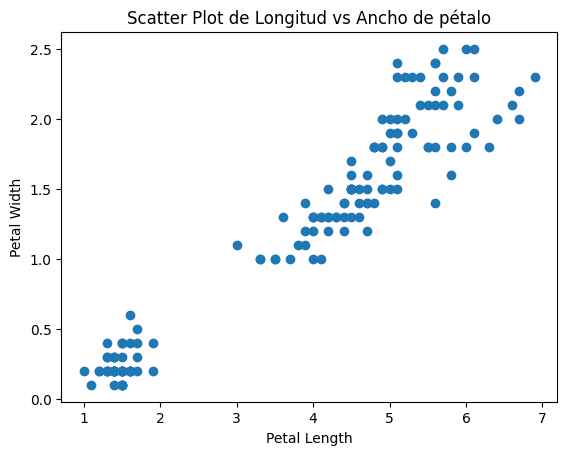

In [586]:
# Scatter plot of Petal_Length vs Petal_Width
plt.scatter(dataset['Petal_Length'], dataset['Petal_Width'])
plt.title('Scatter Plot de Longitud vs Ancho de pétalo')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()



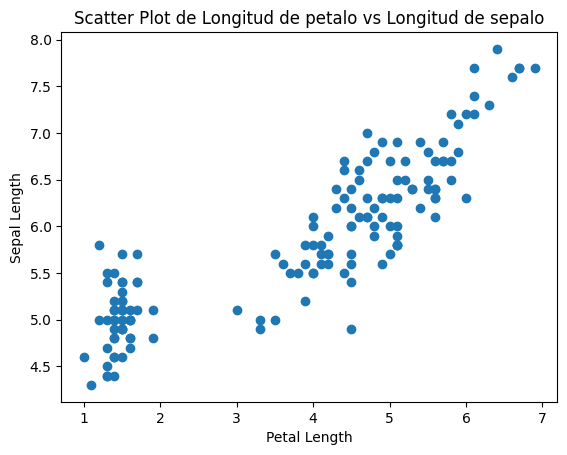

In [587]:
# Scatter plot of Petal_Length vs Sepal_Length

plt.scatter(dataset['Petal_Length'], dataset['Sepal_Length'])
plt.title('Scatter Plot de Longitud de petalo vs Longitud de sepalo')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.show()


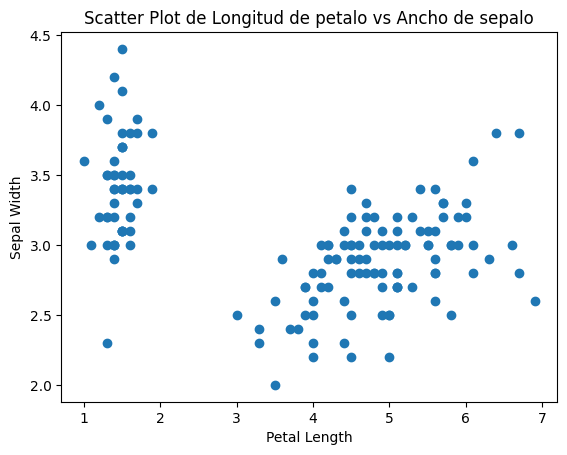

In [588]:
# Scatter plot of Petal_Length vs Sepal_Width

plt.scatter(dataset['Petal_Length'], dataset['Sepal_Width'])
plt.title('Scatter Plot de Longitud de petalo vs Ancho de sepalo')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.show()


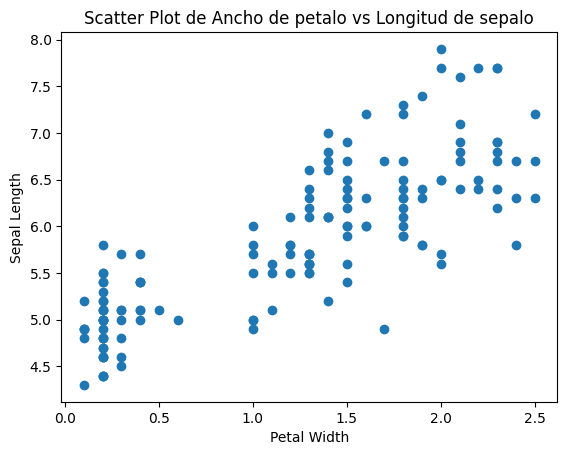

In [589]:
# Scatter plot of Petal_Width vs Sepal_Length

plt.scatter(dataset['Petal_Width'], dataset['Sepal_Length'])
plt.title('Scatter Plot de Ancho de petalo vs Longitud de sepalo')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()


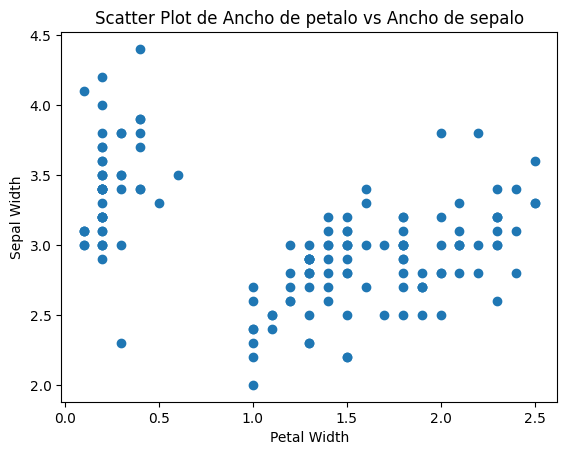

In [590]:
# Scatter plot of Petal_Width vs Sepal_Width

plt.scatter(dataset['Petal_Width'], dataset['Sepal_Width'])
plt.title('Scatter Plot de Ancho de petalo vs Ancho de sepalo')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()


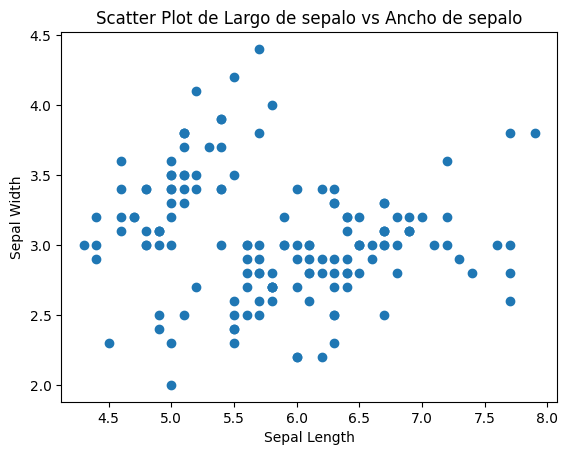

In [591]:
# Scatter plot of Sepal_Length vs Sepal_Width

plt.scatter(dataset['Sepal_Length'], dataset['Sepal_Width'])
plt.title('Scatter Plot de Largo de sepalo vs Ancho de sepalo')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


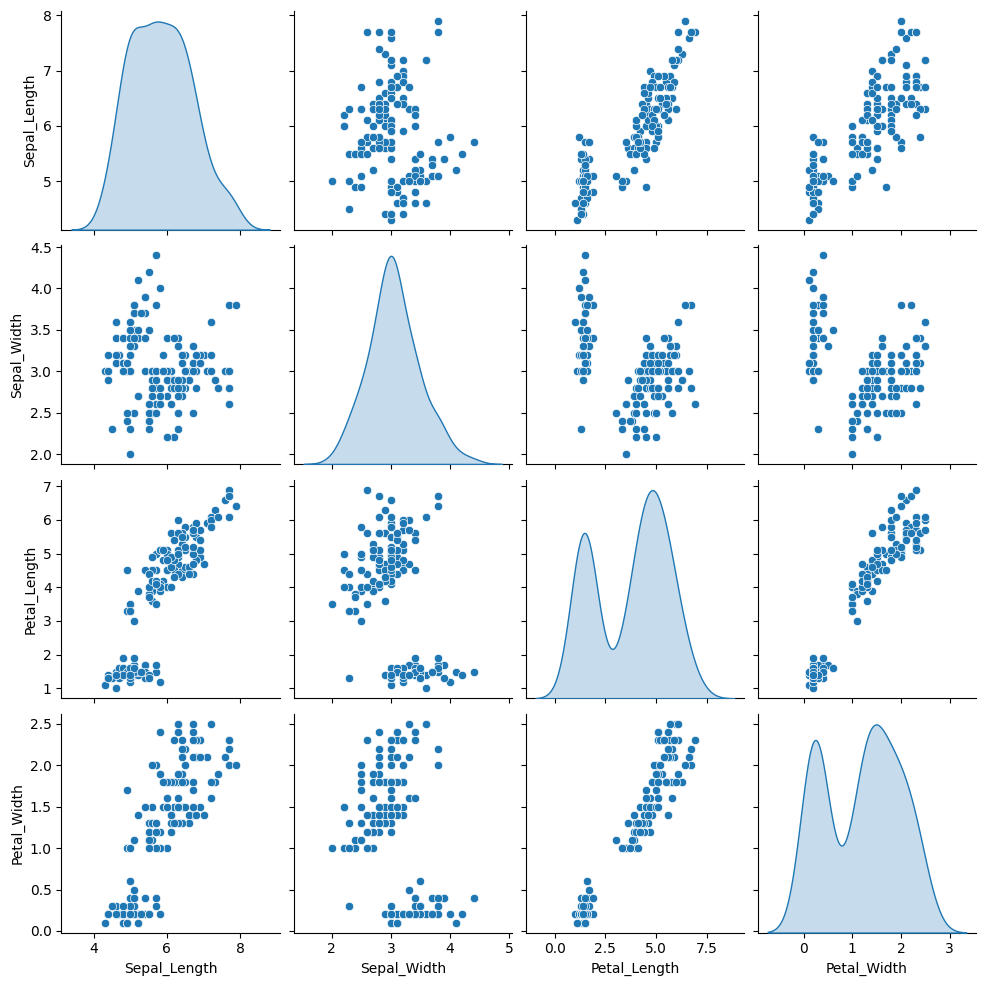

In [592]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset.drop(columns="Flower"), diag_kind="kde")
plt.show()



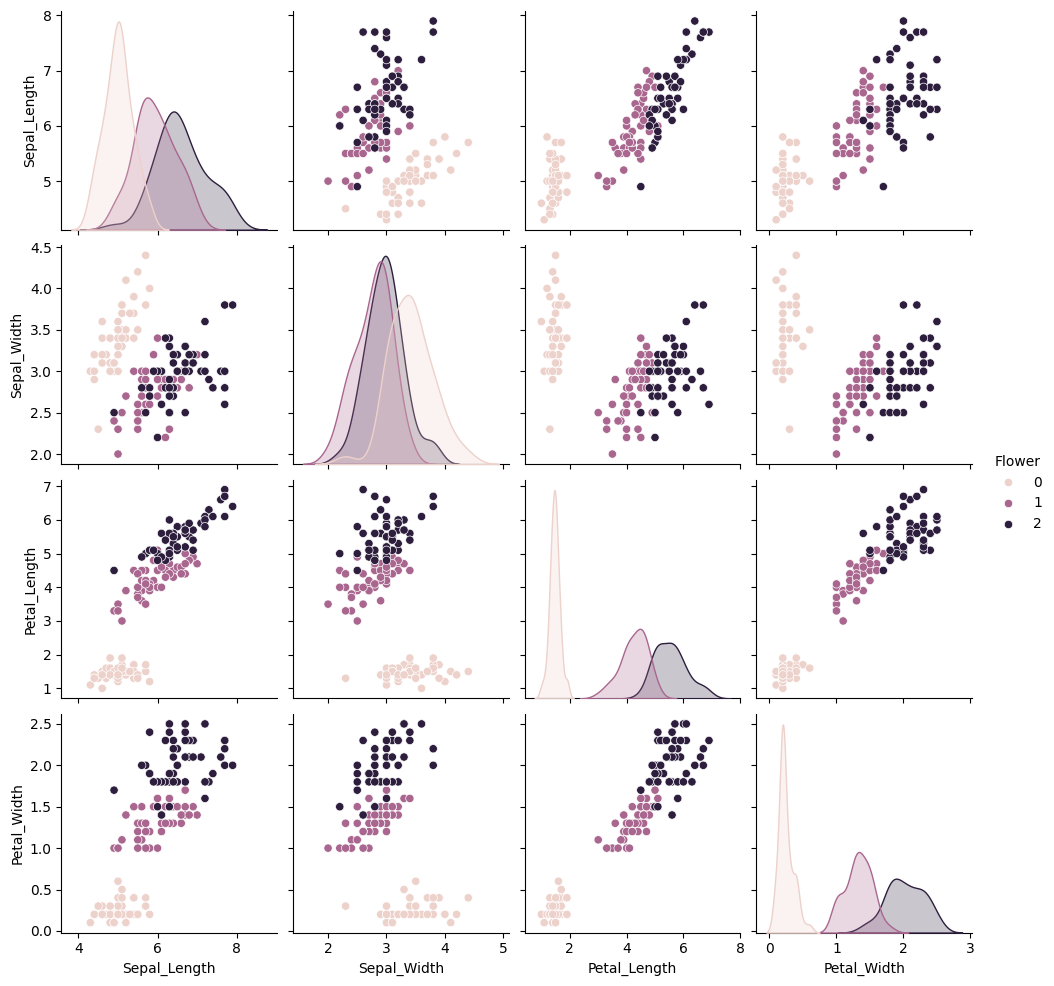

In [593]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset, hue="Flower")
plt.show()



6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [594]:
# Get dataframes for each real cluster



In [595]:
# Scatter plot of each real cluster for Petal




In [596]:
# Scatter plot of each real cluster for Sepal




Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [597]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]]
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"]


In [598]:
# Understand the data X
X.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [599]:
# Understand the data y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Flower, dtype: int64

In [600]:
# Calculate the number of observations in the dataset
X.shape


(150, 4)

In [601]:
# Calculate the number of observations for class 0
y.value_counts()
        


Flower
0    50
1    50
2    50
Name: count, dtype: int64

In [602]:
# Calculate the number of observations for class 1
#en el punto anterior


In [603]:
# Calculate the number of observations for class 2
#en el punto anterior


# Train a classifier

## Train the classification model

In [604]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression
# Initialize the classifier
model = LogisticRegression()
# Fit the model to the training data
model.fit(X,y)


LogisticRegression()

## Predict the class of a new observation

In [605]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [606]:
# Make the prediction using xnew
y_pred=model.predict(xnew)
print(y_pred)
# Get the predicted class



[0]


C:\Users\ali_l\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [607]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [608]:
# Number of observations in the train set
X_train.shape[0]


120

In [609]:
# Number of observations of each class in the train set
y_train.value_counts()

Flower
1    41
0    40
2    39
Name: count, dtype: int64

In [610]:
# Number of observations in the test set
X_test.shape[0]


30

In [611]:
# Number of observations of each class in the test set
y_test.value_counts()


Flower
2    11
0    10
1     9
Name: count, dtype: int64

## Train the classification model

In [612]:

# Initialize the classifier
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

## Test the classification model

In [613]:
# Make the predictions using the test set
y_pred = model.predict(X_test)

In [614]:
# Explore real and predicted labels
print("prediccion")
print(y_pred)
print("real")
print(y_test.values)


prediccion
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
real
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


## Compute the acurracy

In [615]:
# Define a function to compute accuracy
def calcula_precision(arreglo_prediccion, arreglo_test):
    contador=0
    for i in range(0,len(arreglo_prediccion)):
        if arreglo_prediccion[i]==arreglo_test[i]:
            contador+=1
    precision=contador/len(arreglo_prediccion)
    return precision

In [616]:
# Calculate total accuracy
calcula_precision(y_pred,y_test.values)

1.0

In [617]:
# Calculate total accuracy using sklearn.metrics
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [618]:
# Compute accuracy for class 0
from sklearn.metrics import precision_score
precision_0 = precision_score(y_test, y_pred, labels=[0], average='macro')
print(f"Precisión para predecir clase 0: {precision_0}")

Precisión para predecir clase 0: 1.0


In [619]:
# Compute accuracy for class 1
precision_1 = precision_score(y_test, y_pred, labels=[1], average='macro')
print(f"Precisión para predecir clase 1: {precision_1}")


Precisión para predecir clase 1: 1.0


In [620]:
# Compute accuracy for class 2
precision_2 = precision_score(y_test, y_pred, labels=[2], average='macro')
print(f"Precisión para predecir clase 2: {precision_2}")


Precisión para predecir clase 2: 1.0


## Confussion matrix

In [621]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')


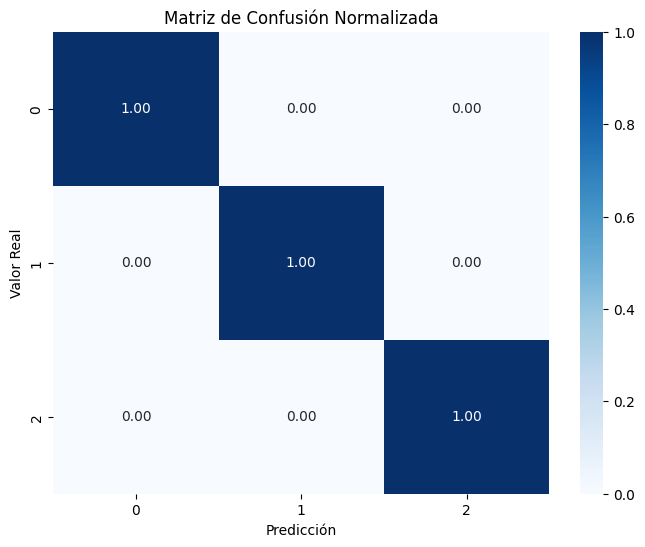

In [622]:
# Plot normalized confussion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de Confusión Normalizada")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?


2) Using the four variables, try with two classifiers. Which provides the best performance?

In [628]:
X_train_petal=X_train.drop(["Sepal_Length","Sepal_Width"], axis=1)#Usando solo petalos
X_test_petal=X_test.drop(["Sepal_Length","Sepal_Width"], axis=1)
X_train_sepal=X_train.drop(["Petal_Length","Petal_Width"], axis=1)#Usando solo sepalos
X_test_sepal=X_test.drop(["Petal_Length","Petal_Width"], axis=1)

model_petal=KNeighborsClassifier(n_neighbors=3)
model_petal.fit(X_train_petal,y_train)
y_pred_petal = model_petal.predict(X_test_petal)
accuracy_petal = accuracy_score(y_test, y_pred_petal)

model_sepal=KNeighborsClassifier(n_neighbors=3)
model_sepal.fit(X_train_sepal,y_train)
y_pred_sepal = model_sepal.predict(X_test_sepal)
accuracy_sepal = accuracy_score(y_test, y_pred_sepal)

print("La precision del modelo usando solo datos de los petalos es: ", accuracy_petal)
print("La precision del modelo usando solo datos de los sepalos es: ", accuracy_sepal)


La precision del modelo usando solo datos de los petalos es:  1.0
La precision del modelo usando solo datos de los sepalos es:  0.8


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 1.0000


Ambos modelos tienen la misma precision